# Microéconomie 5

Toulouse School of Economics </br>
Cours de microéconomie L3, Isabelle Dubec & David Alary </br>
Solutions des TD : Antoine Jacquet, https://antoine-jacquet.github.io

## TD3 : Équilibre et optimum

### Exercice 1 : Premier et second théorèmes du bien-être avec des préférences Cobb–Douglas

Les dotations initiales sont $\omega^A = (16, 2)$ et $\omega^B = (24, 8)$. Les agents ont les fonctions d'utilité

\begin{aligned}
    U^A(x^A) &= (x_1^A)^\frac{1}{2} (x_2^A)^\frac{1}{2} \\
    U^B(x^B) &= (x_1^A)^\frac{1}{4} (x_2^A)^\frac{1}{4}.
\end{aligned}

Les fonctions d'utilité sont les mêmes que celles vues à l'exercice 1 du TD1. Rappellons que nous avions trouvé l'équation de la courbe des optima

\begin{equation}
    x_2^A = \frac{\omega_2}{\omega_1} x_1^A
\end{equation}
ainsi que la frontière des utilités possibles 
\begin{equation}
    U^B = (20 - U^A)^\frac{1}{2},
\end{equation}
ou de manière équivalente 
\begin{equation}
    U^A = 20 - (U^B)^2.
\end{equation}

*Définissons ces données du problème, et représentons la carte d'indifférence à titre d'illustration.*

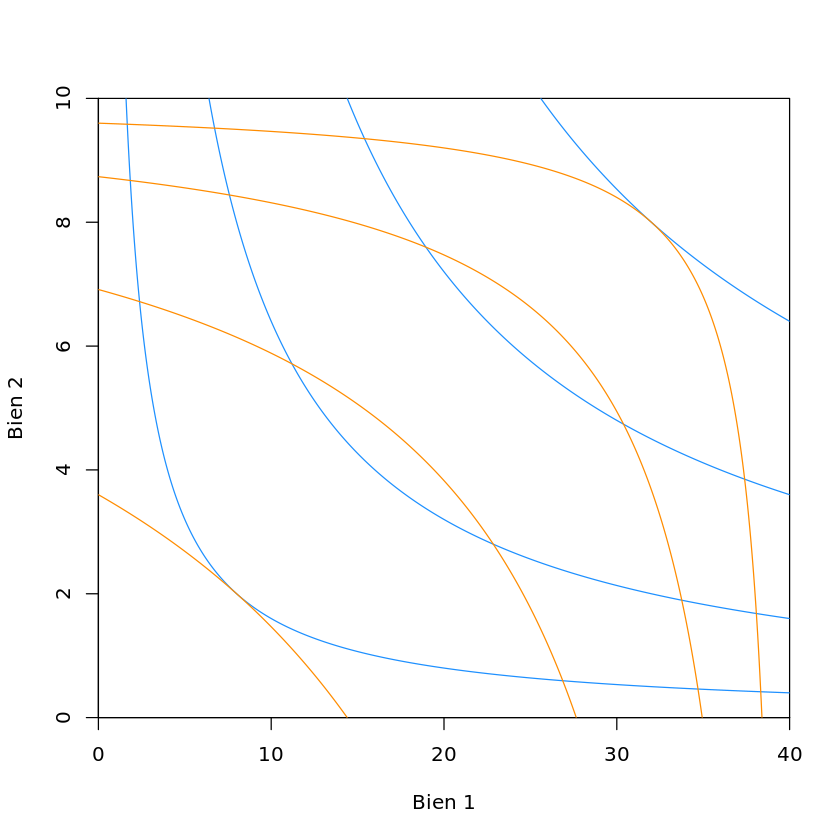

In [1]:
ωA <- c(16, 2)                                # dotation initiale de A
ωB <- c(24, 8)                                # dotation initiale de B
ω1 <- ωA[1] + ωB[1]                           # dotation totale en bien 1
ω2 <- ωA[2] + ωB[2]                           # dotation totale en bien 2
UA <- function(x1, x2) x1^(1/2) * x2^(1/2)    # fonction d'utilité de A
UB <- function(x1, x2) x1^(1/4) * x2^(1/4)    # fonction d'utilité de B

x1 <- seq(0, ω1, length=1000)

indiffA <- function(U) U^2/x1
indiffB <- function(U) U^4/x1

niveauxA <- seq(UA(ω1/5, ω2/5), UA(4*ω1/5, 4*ω2/5), len = 4)
niveauxB <- seq(UB(ω1/5, ω2/5), UB(4*ω1/5, 4*ω2/5), len = 4)

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs = "i", yaxs = "i")
for (U in niveauxA) lines(x1, indiffA(U), col = "dodgerblue", ylim = c(0, ω2))
for (U in niveauxB) lines(ω1 - x1, ω2 - indiffB(U), col = "darkorange", ylim = c(0, ω2))

#### Question 1.

On cherche l'équilibre concurrentiel de cette économie.

**1. Fonctions de demande**

Pour un vecteur de prix $p = (p_1, p_2)$, l'agent $A$ résout

\begin{equation}
    \max_{x^A} \; U^A(x^A) \qquad \text{s.c.} \; p \cdot x^A \leq p \cdot \omega^A.
\end{equation}

Le lagrangien associé est
\begin{equation}
    \mathcal L(x^A, \mu) = (x_1^A)^\frac{1}{2} (x_2^A)^\frac{1}{2} + \mu(p \cdot \omega^A - p \cdot x^A)
\end{equation}

et les conditions du premier ordre
\begin{aligned}
    &\frac{1}{2} \frac{(x_2^A)^\frac{1}{2}}{(x_1^A)^\frac{1}{2}} - \mu p_1 = 0 \\
    &\frac{1}{2} \frac{(x_1^A)^\frac{1}{2}}{(x_2^A)^\frac{1}{2}} - \mu p_2 = 0 \\
    &p \cdot x^A = p \cdot \omega^A.
\end{aligned}

On en déduit
\begin{equation}
    \underbrace{\frac{x_2^A}{x_1^A}}_{= \mathsf{TMS}^A} = \frac{p_1}{p_2} \iff p_1 x_1^A = p_2 x_2^A
\end{equation}

puis on utilise enfin la contrainte de budget pour écrire
\begin{equation}
    p_1 x_1^A = p_2 x_2^A \iff 2 p_1 x_1^A = p \cdot \omega^A 
\end{equation}

d'où les demandes brutes
\begin{equation}
    \boxed{ x_1^A(p) = \frac{p \cdot \omega^A}{2 p_1} }
    \quad \text{et} \quad
    \boxed{ x_2^A(p) = \frac{p \cdot \omega^A}{2 p_2} }.
\end{equation}

Pour $B$ on peut suivre le même raisonnement :
\begin{equation}
    \boxed{ x_1^B(p) = \frac{p \cdot \omega^B}{2 p_1} }
    \quad \text{et} \quad
    \boxed{ x_2^B(p) = \frac{p \cdot \omega^B}{2 p_2} }.
\end{equation}

**Remarque.** Les fonctions d'utilité étant de la forme Cobb–Douglas, on aurait aussi pu obtenir ces demandes brutes directement en utilisant les exposants dans les fonctions d'utilité.
En effet, de manière générale, si un agent a une fonction d'utilité Cobb–Douglas $U(x_1, x_2) = (x_1)^\alpha (x_2)^\beta$ avec $\alpha, \beta > 0$, alors cet agent dépense une part $\frac{\alpha}{\alpha + \beta}$ de sa richesse en bien 1, et une part $\frac{\beta}{\alpha + \beta}$ de sa richesse en bien 2.

Ici, $A$ dépense donc la moitié de sa richesse en bien 1, et l'autre moitié en bien 2. De même, $B$ dépense $\frac{\frac{1}{4}}{\frac{1}{4} + \frac{1}{4}} = \frac{1}{2}$ de sa richesse en bien 1, et la même chose en bien 2.


**2. Équilibre du marché de bien 1**

À l'équilibre concurrentiel le marché du bien 1 doit être équilibré :

\begin{equation}
    x_1^A(p) + x_1^B(p) = \omega_1 \iff \frac{p \cdot \omega^A}{2 p_1} + \frac{p \cdot \omega^B}{2 p_1} = \omega_1 \iff \boxed{\frac{p_1}{p_2} = \frac{\omega_2}{\omega_1}} \overset{\text{A.N.}}{=} \frac{1}{4}.
\end{equation}

On en déduit enfin les allocations d'équilibre en réinjectant ce rapport de prix dans les demandes des agents :

\begin{equation}
    x_1^A = 12, \quad x_2^A = 3, \qquad x_1^B = 28, \quad x_2^B = 7.
\end{equation}

Les niveaux d'utilité associés sont
\begin{align}
    U^A(x^A) &= (12)^\frac{1}{2} (3)^\frac{1}{2} = 6 \\
    U^B(x^B) &= (28)^\frac{1}{4} (7)^\frac{1}{4} \simeq 3,74.
\end{align}


#### Question 2a.

Un projet change les allocations initiales, de telle sorte qu'elles deviennent $\tilde \omega^A = (6, 2)$ et $\tilde \omega^B = (24, 28)$. 

L'équation de la courbe des optima ne change pas, pourvu qu'on prenne bien en compte ces nouvelles valeurs des allocations : 
\begin{equation}
    \boxed{x_2^A = \frac{\tilde \omega_2}{\tilde \omega_1} x_1^A} \overset{\text{A.N.}}{=} x_1^A
\end{equation}
où $\tilde \omega_1 = \tilde \omega_2 = 30$ pour l'application numérique.

La nouvelle frontière des utilités (aussi appellée *frontière de Pareto*) s'obtient en exprimant les utilités à l'optimum en fonction de $x_1^A$.
Rappelons qu'à l'optimum, $x_2^A = x_1^A$, $x_1^B = \tilde \omega_1 - x_1^A$, et $x_2^B = \tilde \omega_2 - x_2^A$.
Ainsi,
\begin{equation}
    U^A
    = (x_1^A)^\frac{1}{2} (x_2^A)^\frac{1}{2}
    = (x_1^A)^\frac{1}{2} (x_1^A)^\frac{1}{2}
    = x_1^A
\end{equation}
et 
\begin{equation}
    U^B
    = (x_1^B)^\frac{1}{4} (x_2^B)^\frac{1}{4}
    = (\tilde \omega_1 - x_1^A)^\frac{1}{4} (\tilde \omega_2 - x_2^A)^\frac{1}{4}
    = (30 - x_1^A)^\frac{1}{4} (30 - x_1^A)^\frac{1}{4}
    = (30 - x_1^A)^\frac{1}{2}
\end{equation}
d'où 
\begin{equation}
    U^B = (30 - U^A)^\frac{1}{2}
\end{equation}
ou de manière équivalente 
\begin{equation}
    U^A = 30 - (U^B)^2.
\end{equation}

Avant le projet, la frontière des utilités avait pour expression $U^A = 20 - (U^B)^2$.
Le projet a donc déplacé cette frontière vers des utilités plus hautes – il est donc globalement bénéfique.

*Représentons ces deux frontières d'utilité. La frontière avant projet est en violet, celle après projet en vert.*

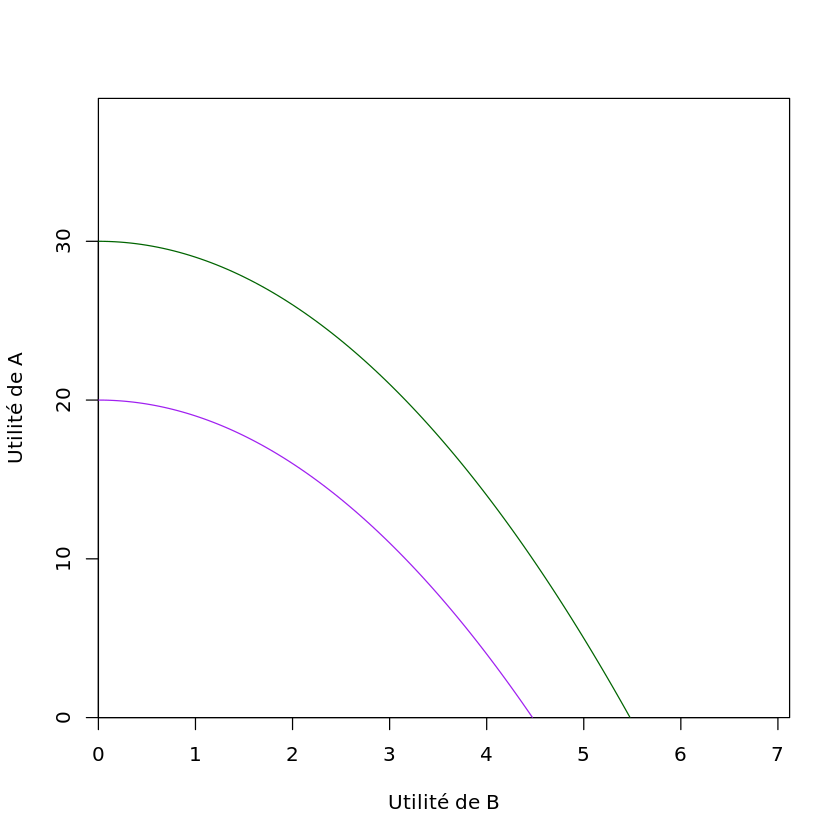

In [2]:
ωApost <- c(6,2)
ωBpost <- c(24,28)
ω1post <- ωApost[1] + ωBpost[1]
ω2post <- ωApost[2] + ωBpost[2]

levelsUBpre <- seq(0, UB(ω1,ω2), length=100)
levelsUBpost <- seq(0, UB(ω1post,ω2post), length=100)

plot(x = x1, y = x1, xlim = c(0, 1.3*UB(ω1post,ω2post)), ylim = c(0, 1.3*UA(ω1post,ω2post)),
     type = "n", xlab = "Utilité de B", ylab = "Utilité de A", xaxs = "i", yaxs = "i")
lines(levelsUBpre, 20 - (levelsUBpre)^2, col = "purple")
lines(levelsUBpost, 30 - (levelsUBpost)^2, col = "darkgreen")

#### Question 2b.

Remplaçons les nouvelles valeurs $\tilde \omega_1$ et $\tilde \omega_2$ dans l'équilibre trouvé ci-dessus. Nous trouvons
\begin{equation}
    \frac{p_1}{p_2} = \frac{\tilde \omega_2}{\tilde \omega_1} \overset{\text{A.N.}}{=} 1
\end{equation}
puis en réinjectant ce rapport de prix dans les demandes brutes,
\begin{equation}
    x_1^A = 4, \quad x_2^A = 4, \qquad x_1^B = 26, \quad x_2^B = 26.
\end{equation}

Les niveaux d'utilité associés sont
\begin{align}
    U^A(x^A) &= (4)^\frac{1}{2} (4)^\frac{1}{2} = 4 \\
    U^B(x^B) &= (26)^\frac{1}{4} (26)^\frac{1}{4} \simeq 5,10.
\end{align}

#### Question 3.

À la situation initiale, où $\omega^A = (16, 2)$ et $\omega^B = (24, 8)$, les utilités des agents sont
\begin{align}
    U^A(\omega^A) &= (16)^\frac{1}{2} (2)^\frac{1}{2} \simeq 5,66 \\
    U^B(\omega^B) &= (24)^\frac{1}{4} (8)^\frac{1}{4} \simeq 3,72.
\end{align}

En comparant ces niveaux d'utilité à ceux de l'équilibre après mise en place du projet (question 2b), on remarque que $B$ gagne à sa mise en place mais que $A$ y perd.
Le projet n'entraîne donc pas une amélioration au sens de Pareto entre la situation initiale et l'équilibre après projet.

On peut aussi comparer les niveaux d'utilité à l'équilibre si le projet n'est pas mis en place (question 1) à ceux de l'équilibre après mise en place du projet – la conclusion est similaire.

#### Question 4.

L'allocation égalitaire $x = (15, 15; 15, 15)$ donne les niveaux d'utilité
\begin{align}
    U^A(x^A) &= (15)^\frac{1}{2} (15)^\frac{1}{2} = 15 \\
    U^B(x^B) &= (15)^\frac{1}{4} (15)^\frac{1}{4} \simeq 3,87.
\end{align}

En comparant ces niveaux d'utilité par rapport à ceux initiaux (voir question 3), on constate que les deux agents y gagnent (idem si on les compare aux niveaux d'utilité à l'équilibre sans mise en place du projet).
Cette allocation égalitaire $x = (15, 15; 15, 15)$ est donc une amélioration au sens de Pareto par rapport à la situation initiale. Puisque c'est aussi un optimum de Pareto dans l'économie post-projet (elle vérifie $x_2^A = x_1^A$) nous savons d'après le second théorème du bien-être que cette allocation peut s'obtenir comme équilibre de cette économie après des transferts adéquats.

On cherche donc à effectuer un transfert monétaire de telle sorte que depuis l'allocation initiale post-projet, $\tilde \omega^A = (6, 2)$ et $\tilde \omega^B = (24, 28)$, on puisse atteindre l'allocation d'équilibre $x^A = (15, 15)$ et $x^B = (15, 15)$.

Pour cela, il faut que la valeur du transfert monétaire $T^A$ vérifie
\begin{equation}
    p_1 \times 6 + p_2 \times 2 + T^A = p_1 \times 15 + p_2 \times 15
\end{equation}

pour des prix $p_1$ et $p_2$ qui obéissent au ratio des prix d'équilibre à l'allocation visée, $\frac{p_1}{p_2} = 1$. Par exemple en prenant $p_1 = p_2 = 1$, il faut

\begin{equation}
    6 + 2 + T^A = 15 + 15 \iff T^A = 22.
\end{equation}

De même pour $B$, on trouve la valeur du transfert $T^B$ par
\begin{equation}
    24 + 28 + T^B = 15 + 15 \iff T^B = -22.
\end{equation}

Notons que ces transferts peuvent en fait prendre n'importe quelle valeur selon les prix choisis. En revanche on doit toujours avoir $T^A = -T^B = 22 \times p_1$.


*Représentons cette situation dans la boîte d'Edgeworth.*
*Les agents sont initialement au point $I$. L'équilibre correspondant est $E$ (la droite de budget d'équilibre est en pointillés).*
*Par un transfert forfaitaire, on peut les amener sur la droite de budget d'équilibre rouge, dont l'équilibre est l'allocation visée $X$.*

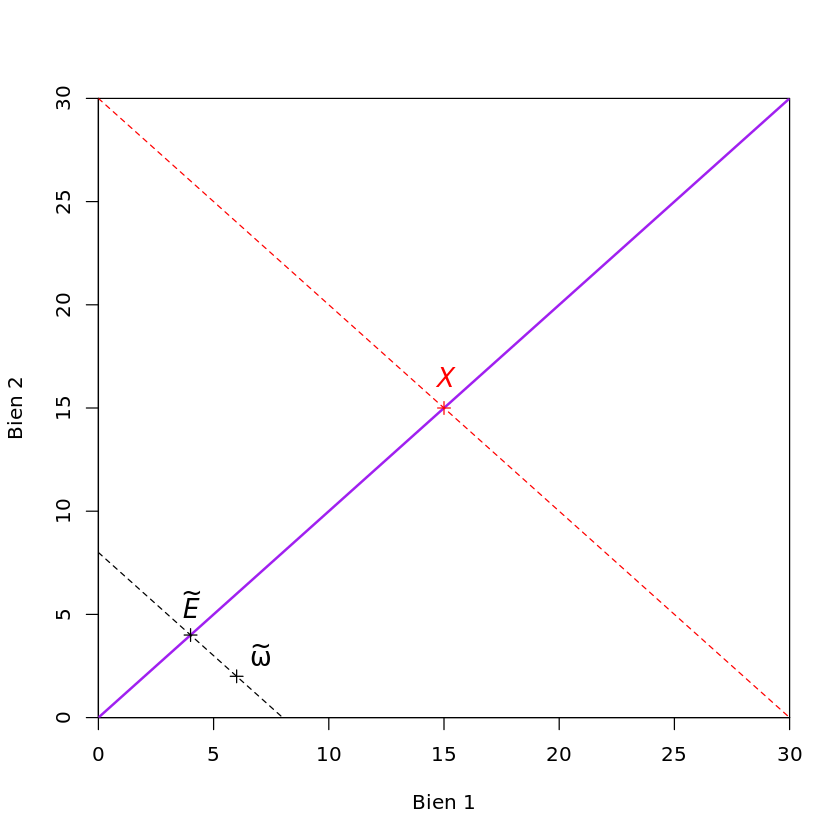

In [3]:
E <- c(12,3)
Epost <- c(4,4)
X <- c(15, 15)

r <- 1

plot(x = x1, y = x1, xlim = c(0, ω1post), ylim = c(0, ω2post),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
lines(c(0, ω1post), c(0, ω2post), lwd = 2, col = "purple")                     # courbe des optima

points(ωApost[1], ωApost[2], pch = 3)                                          # allocation initiale ωpost
    text(ωApost[1]+.05/1.41*ω1post, ωApost[2]+.05/1.41*ω2post, labels = expression(tilde(omega)), cex = 1.3, font = 3)
points(Epost[1], Epost[2], pch=3)                                              # équilibre concurrentiel Epost
    text(Epost[1]-.00*ω1post, Epost[2]+.05*ω2post, labels = expression(tilde(italic(E))), cex = 1.3, font = 3)
points(X[1], X[2], pch = 3, col= "red")                                        # allocation visée X
    text(X[1]+.00*ω1post, X[2]+.05*ω2post, labels = "X", cex = 1.3, font = 3, col = "red")

lines(x1, r*ωApost[1] + ωApost[2] - r*x1, lty = 2)                             # contrainte de budget à E
lines(x1, r*X[1] + X[2] - r*x1, lty = 2, col = "red")                          # contrainte de budget à X

**Rappel de cours sur les transferts.** Pour implémenter l'allocation $x$ on peut :

- Soit faire un transfert de dotation $t^A = (t_1^A, t_2^A)$, $t^B = - t^A$ de telle sorte que la nouvelle allocation post-transfert soit sur la droite rouge dans la boîte d'Edgeworth, le plus simple étant tel que $\omega_1^A + t_1^A = x_1^A$ et $\omega_2^A + t_2^A = x_2^A$,


- Soit faire un transfert forfaitaire $T^A$, $T^B = -T^A$ qui amène les agents sur la droite de budget d'équilibre visée (sans préciser les quantités de chaque bien qui sont prélevées), i.e. tel que $p_x \cdot \omega^A + T^A = p_x \cdot x^A$, où $p_x$ est un vecteur de prix d'équilibre à l'allocation visée $x$.

#### Question 5.

Imaginons d'abord que le projet et les mesures fiscales sont instaurés *simultanément*. Initialement les agents ont les utilités

\begin{equation}
    U^A(16, 2) \simeq 5,66 \qquad U^B(24, 8) \simeq 3,72,
\end{equation}

ou alternativement si on considère l'équilibre sans projet

\begin{equation}
    U^A(12, 3) \simeq 6 \qquad U^B(28,7) \simeq 3,74.
\end{equation}

À la fin ils ont
\begin{equation}
    U^A(15, 15) = 15 \qquad U^B(15, 15) \simeq 3,87.
\end{equation}

L'instauration simultanée des deux mesures mène donc à une amélioration au sens de Pareto : les deux agents sont satisfaits.

Supposons maintenant que les mesures sont instaurées *séquentiellement* : le projet est mis en place avant les mesures fiscales.
Dans ce cas, les utilités initiales et finales sont inchangées.
En revanche, les agents passent cette fois par un stade intermédiaire (équilibre après mise en place du projet mais avant les mesures fiscales) où leurs utilités sont

\begin{equation}
    U^A(4, 4) \simeq 4 \qquad U^B(26, 26) \simeq 5,10.
\end{equation}

Clairement $A$ est perdant et $B$ gagnant par rapport à la situation initiale (c'est normal puisque le projet consiste à prendre des ressources à $A$ et en donner à $B$).

Dans ce cas, il est possible que $A$ s'oppose au projet s'il n'a pas de garantie que les mesures fiscales seront mises en place rapidement.

De la même façon, une fois le projet mis en place, $B$ pourrait s'opposer aux mesures fiscales.


*Voyons ce que cela signifie sur le graphe des frontières d'utilité. La situation initiale correspond au point $\omega$. L'équilibre avant projet est $E$. La situation post-projet est $\tilde \omega$. L'équilibre post-projet est $\tilde E$. La situation finale visée est $X$.*
*On constate que les agents seraient d'accord pour aller directement de $\omega$ ou de $E$ à $X$ (les utilités des deux agents augmentent), mais $A$ n'est pas d'accord pour aller de $\omega$ ou de $E$ vers $\tilde \omega$ ou $\tilde E$. L'agent $B$ n'est quant à lui pas d'accord pour aller de $\tilde \omega$ ou $\tilde E$ vers $X$.*

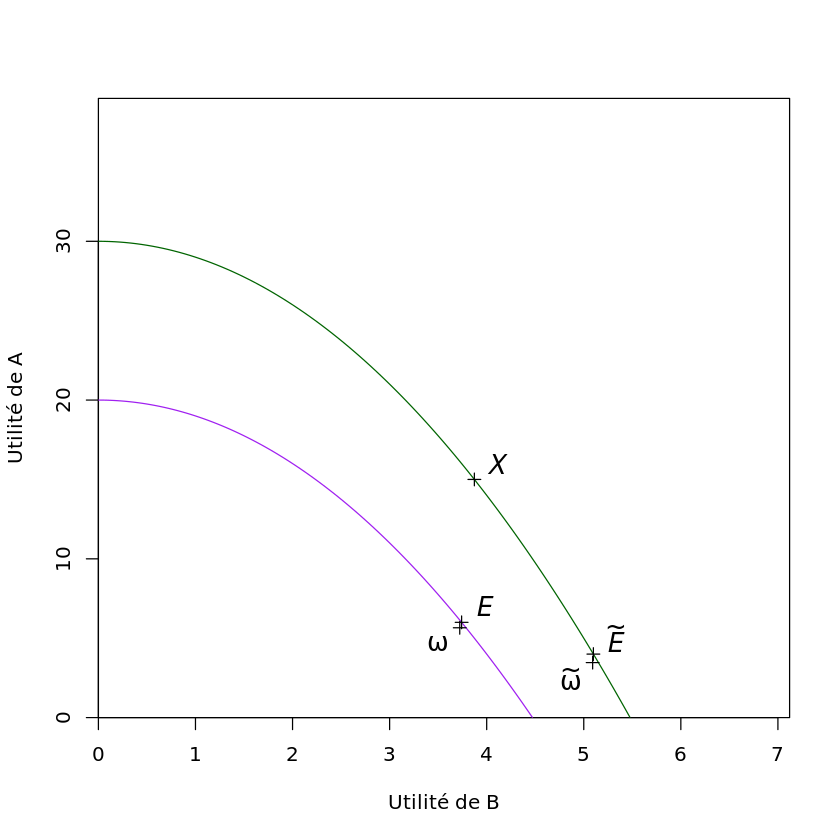

In [6]:
plot(x = x1, y = x1, xlim = c(0, 1.3*UB(ω1post,ω2post)), ylim = c(0, 1.3*UA(ω1post,ω2post)),
     type = "n", xlab = "Utilité de B", ylab = "Utilité de A", xaxs = "i", yaxs = "i")
lines(levelsUBpre, 20 - (levelsUBpre)^2, col = "purple")
lines(levelsUBpost, 30 - (levelsUBpost)^2, col = "darkgreen")

U_ω <- c(UB(ωB[1],ωB[2]),UA(ωA[1],ωA[2]))
points(U_ω[1], U_ω[2], pch = 3, col= "black")
    text(U_ω[1]-.05*UB(ω1,ω2), U_ω[2]-.05*UA(ω1,ω2), labels = expression(omega), cex = 1.3, font = 3, col = "black")

U_E <- c(UB(ω1-E[1],ω2-E[2]),UA(E[1],E[2]))
points(U_E[1], U_E[2], pch = 3, col= "black")
    text(U_E[1]+.05*UB(ω1,ω2), U_E[2]+.05*UA(ω1,ω2), labels = "E", cex = 1.3, font = 3, col = "black")

U_ωpost <- c(UB(ωBpost[1],ωBpost[2]),UA(ωApost[1],ωApost[2]))
points(U_ωpost[1], U_ωpost[2], pch = 3, col= "black")
    text(U_ωpost[1]-.05*UB(ω1,ω2), U_ωpost[2]-.05*UA(ω1,ω2), labels = expression(tilde(omega)), cex = 1.3, font = 3, col = "black")

U_Epost <- c(UB(ω1post - Epost[1],ω2post - Epost[2]),UA(Epost[1],Epost[2]))
points(U_Epost[1], U_Epost[2], pch = 3, col= "black")
    text(U_Epost[1]+.05*UB(ω1,ω2), U_Epost[2]+.05*UA(ω1,ω2), labels = expression(tilde(italic(E))), cex = 1.3, font = 3, col = "black")

U_X <- c(UB(15,15),UA(15,15))
points(U_X[1], U_X[2], pch = 3, col= "black")
    text(U_X[1]+.05*UB(ω1,ω2), U_X[2]+.05*UA(ω1,ω2), labels = "X", cex = 1.3, font = 3, col = "black")
